In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)


torch:  2.4 ; cuda:  2.4.0
detectron2: 0.6


'nvcc' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!python -m pip install opencv-contrib-python

In [2]:

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
import sys, os, distutils.core

In [4]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("CUDA device name:", torch.cuda.get_device_name(0))


PyTorch version: 2.4.0
CUDA version: 11.8
Is CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 3050 Laptop GPU


Checking if file exists: True


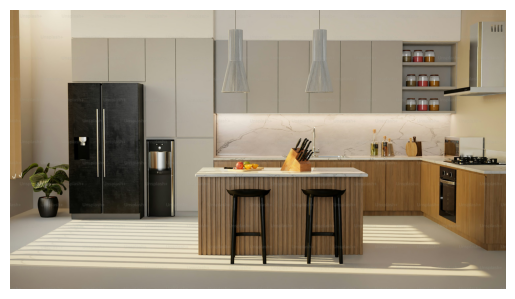

In [5]:
import cv2
import matplotlib.pyplot as plt

file_path = "C://Users//Shreyash Verma//Desktop//ISRO//Detect//train//premium_photo-1680382578857-c331ead9ed51 (1).jpeg"

print("Checking if file exists:", os.path.exists(file_path))

im = cv2.imread(file_path)

if im is None:
    print("Error: Failed to load image. Please check the file path and format.")
else:
    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()


In [6]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[08/13 15:33:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


c:\Users\Shreyash Verma\.conda\envs\ienv\lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([58, 39, 43, 43, 39, 69, 72, 56, 43, 43, 56, 75, 49, 49, 47, 43, 43, 43,
        43, 39, 69], device='cuda:0')
Boxes(tensor([[  59.7084,  909.1710,  357.8220, 1261.4310],
        [2183.9329,  721.7797, 2228.0291,  889.3858],
        [1788.8599,  854.2858, 1834.0607,  913.3826],
        [1722.1708,  779.8020, 1762.2369,  853.2201],
        [2254.6323,  764.5545, 2285.5515,  888.4618],
        [2592.1211,  950.9749, 2700.9475, 1285.7892],
        [ 342.9737,  432.9366,  822.7963, 1308.5736],
        [1759.9303, 1073.3860, 2024.9093, 1555.0161],
        [1759.8434,  849.8915, 1806.5802,  916.9324],
        [1745.4667,  786.3731, 1817.0328,  898.9103],
        [1307.1178, 1072.3265, 1577.3030, 1537.5936],
        [ 166.7284, 1124.7806,  295.0750, 1256.3854],
        [1463.4760,  932.4808, 1501.6000,  961.4675],
        [1414.0648,  931.6503, 1465.3447,  963.4111],
        [1363.0940,  920.7643, 1414.6998,  965.4497],
        [1735.6628,  816.7241, 1792.2716,  916.2451],
        [176

In [8]:
from detectron2.utils.visualizer import Visualizer

# Assuming you have an image `im` and model predictions `outputs`
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))



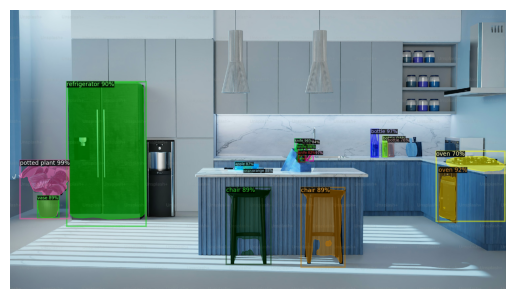

In [9]:
import matplotlib.pyplot as plt

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image_to_show = out.get_image()[:, :, ::-1]

plt.imshow(image_to_show)
plt.axis('off')  # Hide the axes
plt.show()
uploads\forest-wind-crop-3_result.png